In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_excel('Concrete_Data.xlsx')


In [9]:
train_df = df.sample(frac = 0.8, random_state = 42)
test_df = df.drop(train_df.index)

Y_train = train_df["Concrete compressive strength"]
X_train = train_df.drop(columns=["Concrete compressive strength"])

Y_test = test_df["Concrete compressive strength"]
X_test = test_df.drop(columns = ["Concrete compressive strength"])

In [10]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

print(f"Train: {r2_train}, Test: {r2_test}")

Train: 0.6276228967356454, Test: 0.5469672475998618


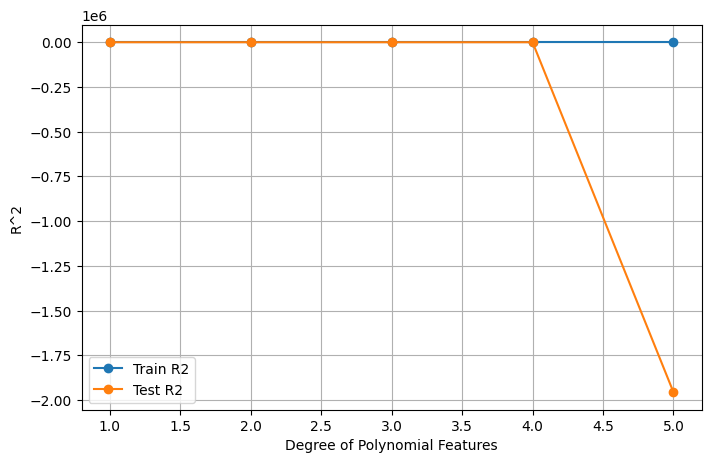

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

degrees = range(1,6)
r2_train_list = []
r2_test_list = []

for degree in degrees:
   pipeline = Pipeline([
       ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
       ("linear_regression", LinearRegression())
   ])

   pipeline.fit(X_train, Y_train)

   y_train_pred = pipeline.predict(X_train)
   y_test_pred = pipeline.predict(X_test)

   r2_train_list.append(r2_score(Y_train, y_train_pred))
   r2_test_list.append(r2_score(Y_test, y_test_pred))

plt.figure(figsize = (8,5))
plt.plot(degrees, r2_train_list, marker ='o', label = "Train R2")
plt.plot(degrees, r2_test_list, marker = 'o', label = "Test R2")
plt.xlabel("Degree of Polynomial Features")
plt.ylabel("R^2")
plt.legend()
plt.grid(True)
plt.show()